**Machine Learning Assignment-1**

Answer to Q1 goes here. Loading the dataset using pandas library in python and printing the column information like name, data types and non-null count using data.info() method.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/iris_dataset.csv')
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


Now, plotting histograms for continuous valued attributes and bar graphs for discrete valued attributes and target class.

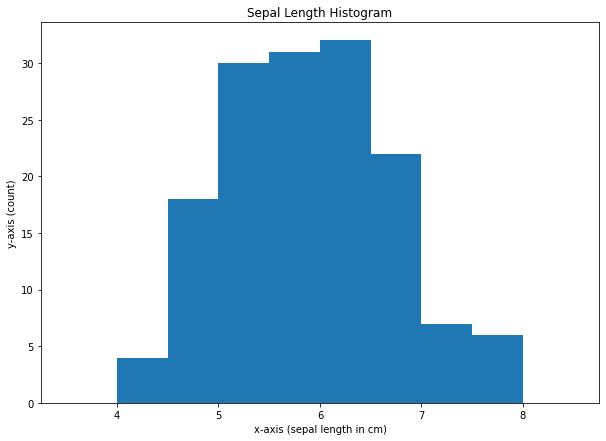

<Figure size 432x288 with 0 Axes>

In [5]:
sepal_length = np.array(data['sepal_length'])
sepal_width = np.array(data['sepal_width'])
petal_length = np.array(data['petal_length'])
petal_width = np.array(data['petal_width'])
target_class = np.array(data['class'])

fig, plot_1 = plt.subplots(figsize = (10, 7))
plot_1.hist(sepal_length, bins = [3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5])
plt.title('Sepal Length Histogram')
plt.xlabel("x-axis (sepal length in cm)")
plt.ylabel("y-axis (count)")
plt.show()
plt.savefig("sepal_length.jpg")

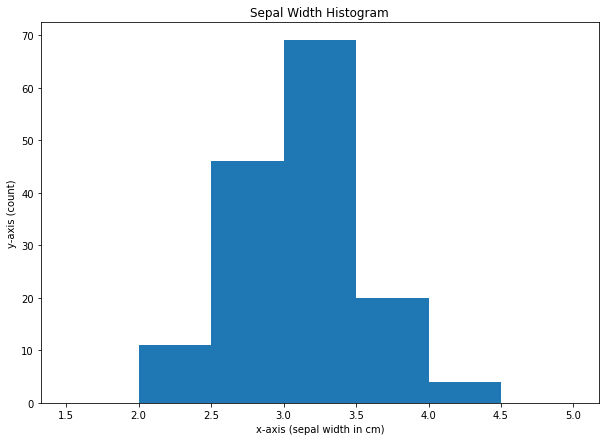

In [6]:
fig, plot_2 = plt.subplots(figsize = (10, 7))
plot_2.hist(sepal_width, bins = [1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.title('Sepal Width Histogram')
plt.xlabel("x-axis (sepal width in cm)")
plt.ylabel("y-axis (count)")
plt.show()

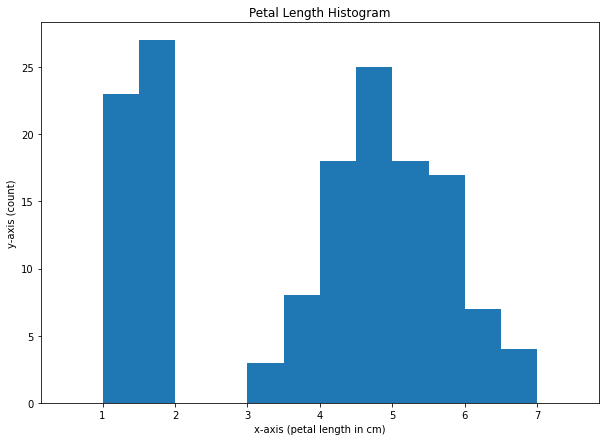

In [7]:
fig, plot_3 = plt.subplots(figsize = (10, 7))
plot_3.hist(petal_length, bins = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5])
plt.title('Petal Length Histogram')
plt.xlabel("x-axis (petal length in cm)")
plt.ylabel("y-axis (count)")
plt.show()

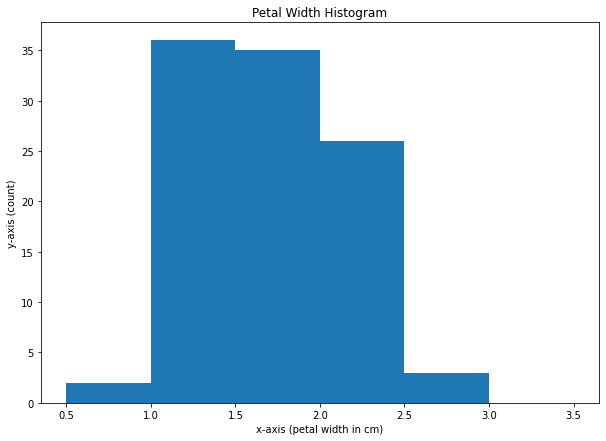

In [8]:
fig, plot_4 = plt.subplots(figsize = (10, 7))
plot_4.hist(petal_width, bins = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5])
plt.title('Petal Width Histogram')
plt.xlabel("x-axis (petal width in cm)")
plt.ylabel("y-axis (count)")
plt.show()

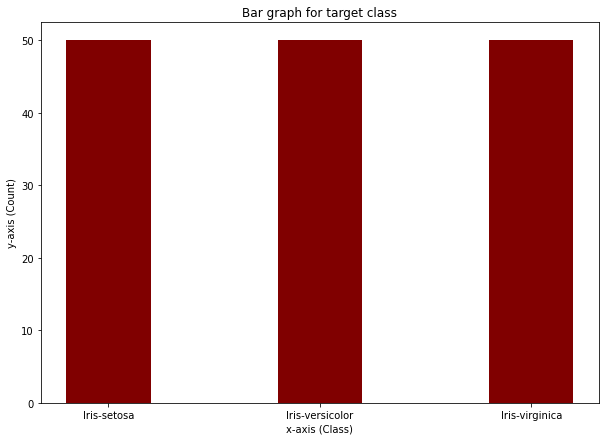

In [9]:
count_setosa = len(data[data['class']=='Iris-setosa'])
count_versicolor = len(data[data['class']=='Iris-versicolor'])
count_virginica = len(data[data['class']=='Iris-virginica'])
target = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
count = [count_setosa, count_versicolor, count_virginica]
fig = plt.figure(figsize = (10, 7))
plt.bar(target, count, color='maroon', width = 0.4)
plt.xlabel('x-axis (Class)')
plt.ylabel('y-axis (Count)')
plt.title('Bar graph for target class')
plt.show()

In [10]:
pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7917 sha256=bb9035a9cb803f047b75d0f08281b746b41c23cb39f90e58c9e0bec4274a37a6
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


Now, importing the MNIST dataset using the idx2numpy package.

In [11]:
import idx2numpy
ndarray = idx2numpy.convert_from_file('/content/gdrive/My Drive/Colab Notebooks/train-images.idx3-ubyte')
ndarray_labels = idx2numpy.convert_from_file('/content/gdrive/My Drive/Colab Notebooks/train-labels.idx1-ubyte')
print("Shape of training data = "+str(ndarray.shape))

Shape of training data = (60000, 28, 28)


So, dataset contains 60000 samples, each sample is an image stored in the form of a matrix of dimension 28*28. Randomly visualizing two images from the dataset-

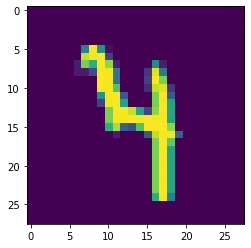

In [12]:
import random
random_img1 = random.randint(0, 59999)
random_img2 = random.randint(0, 59999)
plt.imshow(ndarray[random_img1])

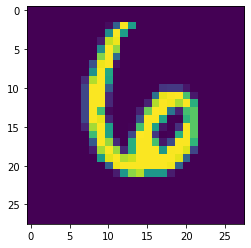

In [13]:
plt.imshow(ndarray[random_img2])

The 28*28 pixels of all the samples are saved in a pandas dataframe so that tSNE can be applied on it for dimensionality reduction. Labels are also stored in a separate dataframe.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/pixel_data.csv', index_col = 0)
labels = pd.DataFrame(ndarray_labels, columns = ['labels'])
print("Shape of the data = "+str(df.shape))

Shape of the data = (60000, 784)


In [ ]:

labels.value_counts()


labels
1         6742
7         6265
3         6131
2         5958
9         5949
0         5923
6         5918
8         5851
4         5842
5         5421
dtype: int64

Now using t-SNE (t-Distributed Stochastic Neighbor Embedding) for reducing the dimensions of the dataset.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
X_train = df
X_train = StandardScaler().fit_transform(X_train)
tsne = TSNE(n_components = 2, random_state = 0)
tsne_res = tsne.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


After dimensionality reduction, the data with reduced dimensions is stored in tsne_res. Now converting labels panda column to numpy array and plotting the scatter plot using seaborn library.

In [ ]:
labels_numpy = labels.loc[:,'labels']
print(labels_numpy.shape)

(60000,)


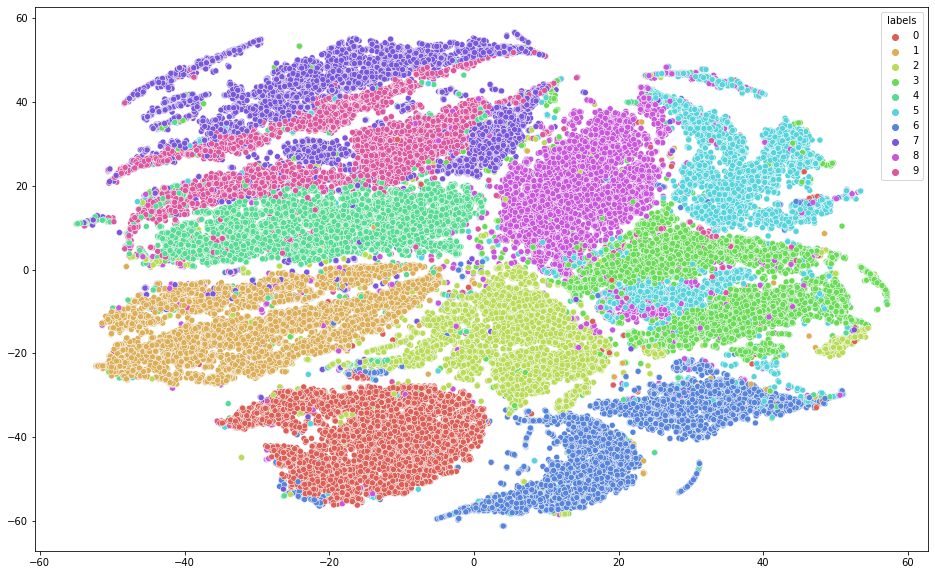

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = labels_numpy, palette = sns.hls_palette(10), legend = 'full')

By looking at scatter plot we can say that samples with same labels are clustered into one group and since data contains ten different target class, ten different clusters can be seen in the scatter plot.

